In [13]:
#importing important libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading Data

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#Since the dataset is unlabelled
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

#fetching data from url
dataset = pd.read_csv(url, names = names)

## Describe Data

In [15]:
dataset.shape

(150, 5)

In [16]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
#descriptive statistics
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualisation

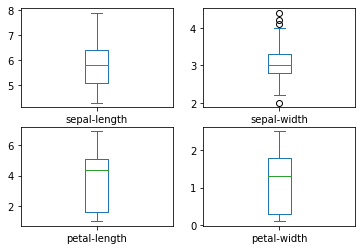

In [19]:
#box and whisker plots
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

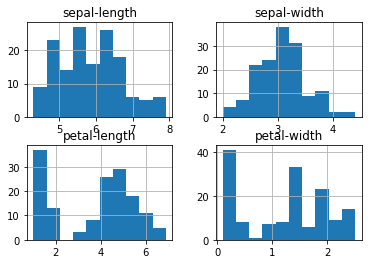

In [20]:
dataset.hist()
plt.show()

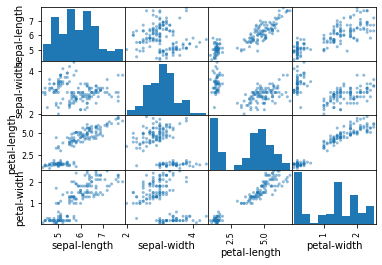

In [21]:
#multivariate plot to check interaction b/w variables 
scatter_matrix(dataset)
plt.show()

# Creating Test & Train Datasets

In [22]:
#Split dataset divide data into train and test 

array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]

#split data as 80% and 20%
validation_size = 0.20

#initialisation of randomisation - every time execute - same result
seed = 7 

#Splitting data and saving 

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
                                    X, Y, test_size = validation_size, 
                                    random_state = seed)


# Building Models

In [23]:
models = []

#saving the models in a list

models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SVM', SVC(gamma = 'auto')))

#evaluating each model 

results = []
names = []

for name, model in models:
    
    kfold = model_selection.KFold(n_splits = 10, shuffle = False)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, 
                                                 cv = kfold, 
                                                 scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR : 0.966667 (0.040825)
LDA : 0.975000 (0.038188)
KNN : 0.983333 (0.033333)
CART : 0.983333 (0.033333)
NB : 0.975000 (0.053359)
SVM : 0.991667 (0.025000)


# Comparing Algorithms and Selecting Best Model

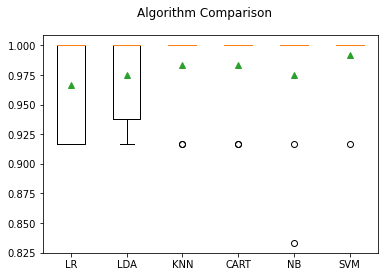

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans = True)
ax.set_xticklabels(names)
plt.show()


# Make Prediction on SVM

In [25]:
# SVM make predictions on validation dataset 
 
svm = SVC(gamma = 'auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))


0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [26]:
# KNN make predictions on validation dataset 
 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)

print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



# The End